In [113]:
#简单数组的创建
import numpy as np
a = np.array([1,3,5,7,9])   #创建一个一维数组
b = np.array([[2,4,6],[3,4,5]])   #创建一个二维数组
print(a)
print(b)

[1 3 5 7 9]
[[2 4 6]
 [3 4 5]]


In [114]:
#分清楚列表和数组的区别
print([3,445,6])    #输出：[3,445,6]（逗号分隔）
print(np.array([3,445,6])) #输出：[  3 445   6]（空格分开） 

[3, 445, 6]
[  3 445   6]


In [115]:
a.shape         #使用numpy中的shape来查看数组的形状

(5,)

In [116]:
zeros = np.zeros((2,3)) #创建一个2行3列的全零矩阵
zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [117]:
#如果列数没有填充就只能在一维数组上进行填充，就跟一维数组似的，若横纵坐标都有则为几行几列的形状
#如若出现行数出现空缺则会有报错，就比如c语言中的数组，在创建二维数组时，列数可以不去管，但是行数必须标明
ones = np.ones((3,))   #创建一个形状为(3,)的全1数组
ones
m = np.ones((2,2))
ones,m

(array([1., 1., 1.]),
 array([[1., 1.],
        [1., 1.]]))

In [118]:
#顺序数组的创建
arange = np.arange(1,21)    #创建一个从1到10的数组//这里不是创建1-10的数组，
#是从1开始小于10的数组，小于后面的范围range的感觉；
#例如1-21，才是[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20]
arange

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

### 数组的随机化创建
1. 在后续深度学习中，我们经常需要对数据进行随机化处理，以确保模型的泛化能力。
2. 为了测试很多函数的性能，往往需要随机化生成很多数据。



- NumPy随机数生成方法对比

| 方法                     | 作用范围/分布       | 记忆口诀               | 典型应用场景           | 示例                     |
|--------------------------|-------------------|----------------------|----------------------|--------------------------|
| `np.random.randint(a,b)` | [a,b]整数         | "int"结尾表示整数      | 生成随机索引/标签      | `np.random.randint(1,10)` → 7 |
| `random.random()`        | [0,1)浮点数       | 纯"random"最基础      | 简单概率模拟          | `random.random()` → 0.548 |
| `np.random.rand()`       | [0,1)均匀分布      | "rand"=random+uniform | 蒙特卡洛模拟          | `np.random.rand(3)` → [0.2,0.5,0.8] |
| `np.random.randn()`      | 标准正态分布(μ=0,σ=1) | 多一个"n"=normal      | 数据标准化/深度学习初始化 | `np.random.randn(2,2)` → [[-0.1,1.2],[0.5,-0.3]] |

- 记忆技巧：
1. **看结尾**：
   - "int" → 整数
   - "n" → 正态(normal)
   
2. **看前缀**：
   - 纯"random" → Python基础随机
   - "np.random" → NumPy增强版

3. **功能差异**：
   - `rand()`和`random()`都是均匀分布，但`rand()`能直接生成数组
   - `randn()`生成的数据会有正有负，其他方法都是非负数

In [119]:
#创建一个2*2的随机数组c,区间为[0,1)
c = np.random.rand(2,2)
c

array([[0.40768703, 0.05536604],
       [0.78853488, 0.28730518]])

In [120]:
np.random.seed(42) #设置随机种子以确保结果可重复 ？？？？？重复什么意思，往下看看再说————
#随机数怎么跟浙大疏锦行生成的一样难道是一个固定的种子，或者说只要参数为42就可以生成一样的数
#生成10个语文成绩（正太分布，均值75，标准差10）
chinese_scores = np.random.normal(75,10,10).round(1)

#找出最高分和最低分及其索引
max_score = np.max(chinese_scores)
max_index = np.argmax(chinese_scores)
min_score = np.min(chinese_scores)
min_index = np.argmin(chinese_scores)

print(f"所有成绩:{chinese_scores}")
print(f"最高分:{max_score}(第{max_index}个学生)")
print(f"最低分:{min_score}(第{min_index}个学生)")

所有成绩:[80.  73.6 81.5 90.2 72.7 72.7 90.8 82.7 70.3 80.4]
最高分:90.8(第6个学生)
最低分:70.3(第8个学生)


数组的遍历

In [121]:
scores = np.array([5, 9, 9, 11, 11, 13, 15, 19])
scores += 1     #scores = scores + 1    这里竟然将该数组中的所有数据都加了1
sum = 0
for i in scores:
    print(i)
    sum += i
print(sum)

6
10
10
12
12
14
16
20
100


### 数组的运算

1. 矩阵乘法：需要满足第一个矩阵的列数等于第二个矩阵的行数，和线代的矩阵乘法算法相同。
2. 矩阵点乘：需要满足两个矩阵的行数和列数相同，然后两个矩阵对应位置的元素相乘。
3. 矩阵转置：将矩阵的行和列互换。
4. 矩阵求逆：需要满足矩阵是方阵且行列式不为0，然后使用伴随矩阵除以行列式得到逆矩阵。
5. 矩阵求行列式：需要满足矩阵是方阵，然后使用代数余子式展开计算行列式。


In [122]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[7, 8], [9, 10], [11, 12]])
print(a)
print(b)

[[1 2]
 [3 4]
 [5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


In [123]:
print(a + b)        #对应位置相加

[[ 8 10]
 [12 14]
 [16 18]]


In [124]:
print(a - b)

[[-6 -6]
 [-6 -6]
 [-6 -6]]


In [125]:
print(a / b)

[[0.14285714 0.25      ]
 [0.33333333 0.4       ]
 [0.45454545 0.5       ]]


加上print后是输出的使用空格隔开，数组的显示为使用逗号隔开

In [126]:
a * b

array([[ 7, 16],
       [27, 40],
       [55, 72]])

b.T为b的转置      @为矩阵的乘法而不是a*b时对应元素的相乘返回到原本的位置

In [127]:
a @ b.T   # 矩阵乘法,3*2的矩阵和2*3的矩阵相乘，得到3*3的矩阵

array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])

数组的索引

一维数组的索引

In [128]:
arr1d = np.array([1,3,5,7,8,10,12,13,14,15])   #创建一个一维数组
arr1d

array([ 1,  3,  5,  7,  8, 10, 12, 13, 14, 15])

这里的使用print与不使用有点区别不知道是不是编译器的问题，但应该是一个问题

In [129]:
#取第一个元素
print(arr1d[0])
arr1d[0]

1


np.int64(1)

In [130]:
#取出数组的最后一个元素。-1倒数第一个元素。还有就是这里的print在前是有两个输出，print在后只有print一个输出
print(arr1d[-1])
arr1d[-1]
#不知道为什么，但还是那句话，无伤大雅

15


np.int64(15)

In [131]:
# 3. 取出数组中索引为 3, 5, 8 的元素。
# 使用整数数组进行索引，可以一次性取出多个元素。语法是 arr1d[[index1, index2, ...]]。
arr1d[[3, 5, 8]]
#这里我换了数组给我的感觉这么巧，本质上就是巧了，但是索引值跟随机创建的数组是一一对应的

array([ 7, 10, 14])

In [132]:
# 切片取出索引
arr1d[2:6] # 取出索引为2到5的元素（不包括索引6的元素，取左不取右）

array([ 5,  7,  8, 10])

In [133]:
# 取出数组中从头到索引 5 (不包含 5) 的元素。
# 使用切片 slice [:stop]
arr1d[:5]       #即为0 ，1，2，3，4

array([1, 3, 5, 7, 8])

In [134]:
# 取出数组中从索引 4 到结尾的元素。
# 使用切片 slice [start:]
arr1d[4:]

array([ 8, 10, 12, 13, 14, 15])

In [135]:
# 取出全部元素
arr1d[:]

array([ 1,  3,  5,  7,  8, 10, 12, 13, 14, 15])

In [136]:
# 7取出数组中所有偶数索引对应的元素 (即索引 0, 2, 4, 6, 8)。
# 使用带步长的切片 slice [start:stop:step]
arr1d[::2]

array([ 1,  5,  8, 12, 14])

二维数组的索引


In [137]:
# 数组:
arr2d = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])
arr2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

索引顺序：在二维数组 arr2d 里，第一个索引值代表行，第二个索引值代表列。比如 arr2d[i, j] ，i 是行索引，j 是列索引。

In [138]:
# 取出第 1 行 (索引为 1) 的所有元素。
#
# 使用索引 arr[row_index, :] 或 arr[row_index]
print(arr2d[0, :])
arr2d[1]

[1 2 3 4]


array([5, 6, 7, 8])

In [139]:
# 取出第 2 列 (索引为 2) 的所有元素。
# 使用索引 arr[:, column_index]
#此时冒号不可省略
arr2d[:, 2]

array([ 3,  7, 11, 15])

In [140]:
# 取出位于第 2 行 (索引 2)、第 3 列 (索引 3) 的元素。
# 使用 arr[row_index, column_index]
arr2d[2, 3]

np.int64(12)

In [141]:
# 取出由第 0 行和第 2 行组成的新数组。
# 使用整数数组作为行索引 arr[[row1, row2, ...], :]
arr2d[[0, 2], :]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [142]:
# 取出由第 1 列和第 3 列组成的新数组。
# 使用整数数组作为列索引 arr[:, [col1, col2, ...]]
arr2d[:, [1, 3]]

array([[ 2,  4],
       [ 6,  8],
       [10, 12],
       [14, 16]])

这里的1:3此时这里的只取索引值为1与2的行或列

In [143]:
# 取出一个 2x2 的子矩阵，包含元素 6, 7, 10, 11。
# 使用切片 slice arr[row_start:row_stop, col_start:col_stop]
arr2d[1:3, 1:3]     

array([[ 6,  7],
       [10, 11]])

三维数组的索引【这真是顺口啊，我没看下面的内容一看3，4，5就能顺出3行4列5层哈哈

In [144]:
arr3d = np.arange(3 * 4 * 5).reshape((3, 4, 5))
arr3d 

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [145]:
# 选择特定的层
# 使用整数数组 [0, 2] 作为第一个维度 (层) 的索引
arr3d[1, :, :]      #这里即第0层第1层第2层的说法后面则与二维数组的索引如初一侧，应是如此，
#就比如在学校找一个同学，应是先知道他在几层楼之后在在是某个班级的某个地方


array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])

In [146]:
arr3d[1, 0:2, :]

array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [147]:
arr3d[1, 0:2, 2:4]

array([[22, 23],
       [27, 28]])

SHAP值的深入理解

现在重新审视下之前的shap数组


In [148]:
import pandas as pd
import pandas as pd    #用于数据处理和分析，可处理表格数据。
import numpy as np     #用于数值计算，提供了高效的数组操作。
import matplotlib.pyplot as plt    #用于绘制各种类型的图表
import seaborn as sns   #基于matplotlib的高级绘图库，能绘制更美观的统计图形。
import warnings
warnings.filterwarnings("ignore")
 
 # 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
data = pd.read_csv('data.csv')    #读取数据
# 先筛选字符串变量 
discrete_features = data.select_dtypes(include=['object']).columns.tolist()
# Home Ownership 标签编码
home_ownership_mapping = {
    'Own Home': 1,
    'Rent': 2,
    'Have Mortgage': 3,
    'Home Mortgage': 4
}
data['Home Ownership'] = data['Home Ownership'].map(home_ownership_mapping)

# Years in current job 标签编码
years_in_job_mapping = {
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}
data['Years in current job'] = data['Years in current job'].map(years_in_job_mapping)

# Purpose 独热编码，记得需要将bool类型转换为数值
data = pd.get_dummies(data, columns=['Purpose'])
data2 = pd.read_csv("data.csv") # 重新读取数据，用来做列名对比
list_final = [] # 新建一个空列表，用于存放独热编码后新增的特征名
for i in data.columns:
    if i not in data2.columns:
       list_final.append(i) # 这里打印出来的就是独热编码后的特征名
for i in list_final:
    data[i] = data[i].astype(int) # 这里的i就是独热编码后的特征名



# Term 0 - 1 映射
term_mapping = {
    'Short Term': 0,
    'Long Term': 1
}
data['Term'] = data['Term'].map(term_mapping)
data.rename(columns={'Term': 'Long Term'}, inplace=True) # 重命名列
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()  #把筛选出来的列名转换成列表
 
 # 连续特征用中位数补全
for feature in continuous_features:     
    mode_value = data[feature].mode()[0]            #获取该列的众数。
    data[feature].fillna(mode_value, inplace=True)          #用众数填充该列的缺失值，inplace=True表示直接在原数据上修改。

# 最开始也说了 很多调参函数自带交叉验证，甚至是必选的参数，你如果想要不交叉反而实现起来会麻烦很多
# 所以这里我们还是只划分一次数据集
from sklearn.model_selection import train_test_split
X = data.drop(['Credit Default'], axis=1)  # 特征，axis=1表示按列删除
y = data['Credit Default'] # 标签
# 按照8:2划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80%训练集，20%测试集

from sklearn.ensemble import RandomForestClassifier #随机森林分类器

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 用于评估分类器性能的指标
from sklearn.metrics import classification_report, confusion_matrix #用于生成分类报告和混淆矩阵
import warnings #用于忽略警告信息
warnings.filterwarnings("ignore") # 忽略所有警告信息
# --- 1. 默认参数的随机森林 ---
# 评估基准模型，这里确实不需要验证集
print("--- 1. 默认参数随机森林 (训练集 -> 测试集) ---")
import time # 这里介绍一个新的库，time库，主要用于时间相关的操作，因为调参需要很长时间，记录下会帮助后人知道大概的时长
start_time = time.time() # 记录开始时间
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) # 在训练集上训练
rf_pred = rf_model.predict(X_test) # 在测试集上预测
end_time = time.time() # 记录结束时间

print(f"训练与预测耗时: {end_time - start_time:.4f} 秒")
print("\n默认随机森林 在测试集上的分类报告：")
print(classification_report(y_test, rf_pred))
print("默认随机森林 在测试集上的混淆矩阵：")
print(confusion_matrix(y_test, rf_pred))

--- 1. 默认参数随机森林 (训练集 -> 测试集) ---
训练与预测耗时: 1.1804 秒

默认随机森林 在测试集上的分类报告：
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1059
           1       0.79      0.30      0.43       441

    accuracy                           0.77      1500
   macro avg       0.78      0.63      0.64      1500
weighted avg       0.77      0.77      0.73      1500

默认随机森林 在测试集上的混淆矩阵：
[[1023   36]
 [ 309  132]]


In [149]:
import shap
import matplotlib.pyplot as plt

# 初始化 SHAP 解释器
explainer = shap.TreeExplainer(rf_model)

# 计算 SHAP 值（基于测试集），这个shap_values是一个numpy数组，表示每个特征对每个样本的贡献值
# 这里大家先知道这是个numpy数组即可，我们后面学习完numpy在来回头解读这个值
shap_values = explainer.shap_values(X_test) # 这个计算耗时

In [150]:
shap_values 

array([[[ 9.07465700e-03, -9.07465700e-03],
        [ 7.21456498e-03, -7.21456498e-03],
        [ 4.55189444e-02, -4.55189444e-02],
        ...,
        [ 7.12857198e-05, -7.12857198e-05],
        [ 4.67733508e-05, -4.67733508e-05],
        [ 1.61298135e-04, -1.61298135e-04]],

       [[-1.02606871e-02,  1.02606871e-02],
        [ 1.85572634e-02, -1.85572634e-02],
        [-1.64992848e-02,  1.64992848e-02],
        ...,
        [ 2.00070852e-04, -2.00070852e-04],
        [ 5.11798841e-05, -5.11798841e-05],
        [ 1.02827796e-04, -1.02827796e-04]],

       [[ 3.21529115e-03, -3.21529115e-03],
        [ 1.28184070e-02, -1.28184070e-02],
        [ 1.02124914e-01, -1.02124914e-01],
        ...,
        [ 1.73012306e-04, -1.73012306e-04],
        [ 4.74133256e-05, -4.74133256e-05],
        [ 1.26753231e-04, -1.26753231e-04]],

       ...,

       [[ 1.15222741e-03, -1.15222741e-03],
        [-1.71843266e-02,  1.71843266e-02],
        [-3.04994337e-02,  3.04994337e-02],
        ...,
     

In [151]:
shap_values[0,:,:]

array([[ 9.07465700e-03, -9.07465700e-03],
       [ 7.21456498e-03, -7.21456498e-03],
       [ 4.55189444e-02, -4.55189444e-02],
       [ 3.47666501e-04, -3.47666501e-04],
       [ 2.57821493e-04, -2.57821493e-04],
       [ 2.00758099e-03, -2.00758099e-03],
       [-7.54175659e-03,  7.54175659e-03],
       [-1.35324163e-03,  1.35324163e-03],
       [-7.08191659e-04,  7.08191659e-04],
       [-6.06829865e-03,  6.06829865e-03],
       [-1.90501403e-03,  1.90501403e-03],
       [ 1.44384291e-02, -1.44384291e-02],
       [-4.91452434e-02,  4.91452434e-02],
       [ 6.28172371e-03, -6.28172371e-03],
       [-1.64613559e-02,  1.64613559e-02],
       [-6.04576031e-01,  6.04576031e-01],
       [ 4.58074016e-04, -4.58074016e-04],
       [-1.95125086e-05,  1.95125086e-05],
       [-1.47478232e-05,  1.47478232e-05],
       [ 6.27274034e-04, -6.27274034e-04],
       [-1.26003035e-05,  1.26003035e-05],
       [-3.58303017e-04,  3.58303017e-04],
       [ 7.89740644e-05, -7.89740644e-05],
       [ 2.

In [152]:
shap_values[0,:,:].shape

(31, 2)

In [153]:
# 三个维度
# 第一个维度是样本数
# 第二个维度是特征数
# 第三个维度是类别数
shap_values.shape

(1500, 31, 2)

In [154]:
# 比如我想取出所有样本对第一个类别的贡献值
#是不是可以理解为第0与第1两个类别
shap_values[:,:,0]

array([[ 9.07465700e-03,  7.21456498e-03,  4.55189444e-02, ...,
         7.12857198e-05,  4.67733508e-05,  1.61298135e-04],
       [-1.02606871e-02,  1.85572634e-02, -1.64992848e-02, ...,
         2.00070852e-04,  5.11798841e-05,  1.02827796e-04],
       [ 3.21529115e-03,  1.28184070e-02,  1.02124914e-01, ...,
         1.73012306e-04,  4.74133256e-05,  1.26753231e-04],
       ...,
       [ 1.15222741e-03, -1.71843266e-02, -3.04994337e-02, ...,
         1.44859329e-04,  1.80111014e-05,  1.30107512e-04],
       [ 1.29249120e-03,  5.66948438e-03,  2.49050264e-02, ...,
         2.50590715e-06,  4.68839113e-05,  1.15002997e-05],
       [-1.12640555e-03,  1.42648293e-02,  4.74790019e-02, ...,
         6.19451775e-05,  3.30996384e-05,  4.45219920e-05]])

--- 1. SHAP 特征重要性条形图 ---


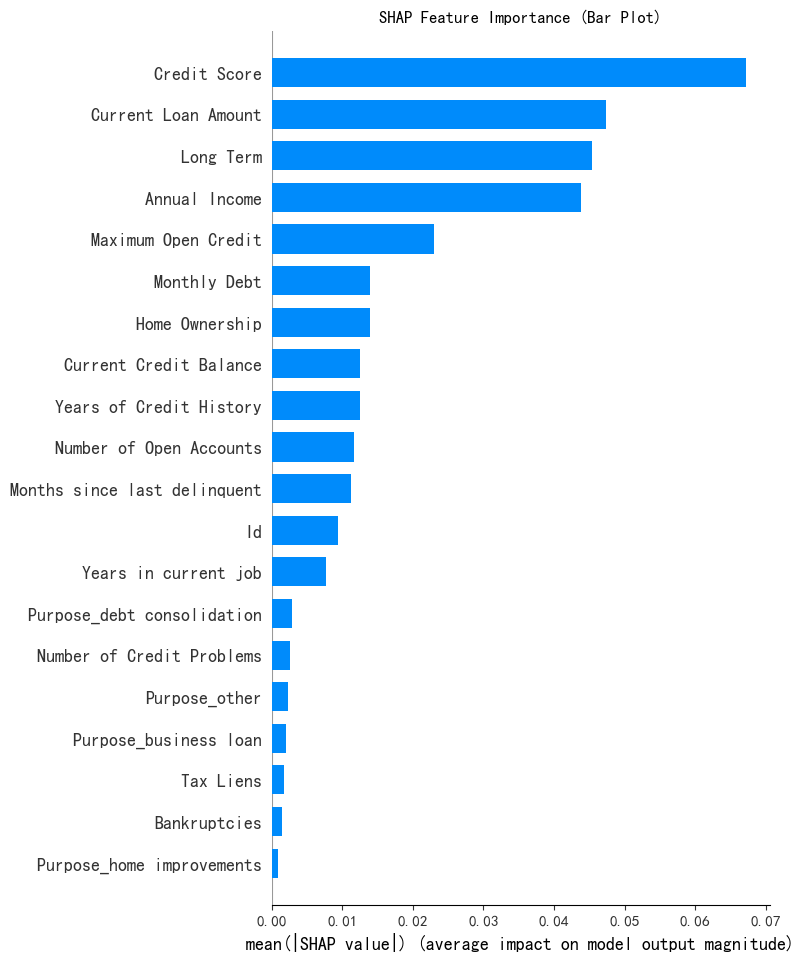

In [155]:
# --- 1. SHAP 特征重要性条形图 (Summary Plot - Bar) ---
print("--- 1. SHAP 特征重要性条形图 ---")
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="bar",show=False)  #  这里的show=False表示不直接显示图形,这样可以继续用plt来修改元素，不然就直接输出了
plt.title("SHAP Feature Importance (Bar Plot)")
plt.show()